In [1]:
# Calculate band response curves based on current HST detector QE tables
# https://hst-docs.stsci.edu/wfc3ihb/appendix-a-wfc3-filter-throughputs/a-2-throughputs-and-signal-to-noise-ratio-data#A.2ThroughputsandSignaltoNoiseRatioData-A.2.1

In [39]:
import synphot 
import stsynphot as stsyn
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

In [57]:
filters = ["F225W", "F275W", "F336W", "F475W", "F814W", "F110W","F160W"]
f1 = stsyn.band('wfc3,uvis1,f225w')
f2 = stsyn.band('wfc3,uvis1,f275w')
f3 = stsyn.band('wfc3,uvis1,f336w')
f4 = stsyn.band('acs,wfc2,f475w')
f5 = stsyn.band('acs,wfc2,f814w')
f6 = stsyn.band('wfc3,ir,f110w')
f7 = stsyn.band('wfc3,ir,f160w')

(1500, 20000)

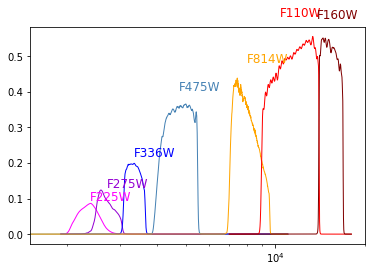

In [58]:
filt_names=True
lw = 1
wl = [f1.binset, f2.binset, f3.binset, f4.binset, f5.binset, f6.binset,f7.binset]
thput = [f1(f1.binset), f2(f2.binset), f3(f3.binset), f4(f4.binset), f5(f5.binset), f6(f6.binset), f7(f7.binset)]
c=['magenta', 'darkviolet', 'blue', 'steelblue', 'orange', 'red', 'maroon']
# to get the pivot WL of the band pass
wl_piv = [f1.pivot(), f2.pivot(), f3.pivot(), f4.pivot(), f5.pivot(), f6.pivot(), f7.pivot()]

norm = None
for i in range(len(filters)):
    if norm == 'alav': # normalize to Al/Av = 3
        normfact = 3./max(thput[i])
        plt.plot(wl[i], normfact*thput[i], c=c[i], lw=lw)
    else:
        normfact = 1.
        plt.plot(wl[i], thput[i], c=c[i], lw=lw)

    if filt_names:
        piv = wl_piv[i].value
        if i==1:
            plt.text(piv, 1.05 * max(normfact*thput[i]), s='%s' % filters[i], c=c[i], fontsize=12)
        elif i==5 or i==6:
            plt.text(0.9*piv, 1.1 * max(normfact*thput[i]), s='%s' % filters[i], c=c[i], fontsize=12)
        else:
            plt.text(piv, 1.1 * max(normfact*thput[i]), s='%s' % filters[i], c=c[i], fontsize=12)

plt.xscale('log')
plt.xlim(1500, 20000)

In [16]:
print(type(bp_f275))
print(bp_f275.avgwave)
print(bp_f275)

<class 'stsynphot.spectrum.ObservationSpectralElement'>
<bound method BaseSpectrum.avgwave of <stsynphot.spectrum.ObservationSpectralElement object at 0x7fcebd44a9d0>>
ObservationSpectralElement
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] * [1] * [2] * [3] * [4] * [5] * [6] * [7] * [8]
Components: 
    [0]: <Empirical1D(points=(array([  500.,  1000.,  1010., ..., 10990., 30000., 30010.], dtype=float32),), lookup_table=[0.        0.023     0.0333593 ... 0.731268  0.731268  0.       ])>

    [1]: <Empirical1D(points=(array([ 1988.,  1989.,  1990.,  2050.,  2230.,  2430.,  2630.,  2830.,
            3030.,  3230.,  3430.,  3630.,  3830.,  4030.,  4230.,  4430.,
            4630.,  4830.,  5030.,  5230.,  5430.,  5630.,  5830.,  6030.,
            6230.,  6430.,  6630.,  6830.,  7030.,  7230.,  7430.,  7630.,
            7830.,  8000.,  8030.,  8200.,  8230.,  8400.,  8430.,  8600.,
            8630.,  8800.,  8830.,  9000.,  9030.,  9200.,  9230.,